In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV,KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [2]:
bcancer=pd.read_csv('BreastCancer.csv',index_col=['Code'])
dum_bcancer = pd.get_dummies(bcancer,drop_first=True)
X=dum_bcancer.drop('Class_Malignant',axis=1)
y=dum_bcancer['Class_Malignant']      

In [3]:
bcancer['Class'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [5]:
dtc=DecisionTreeClassifier(random_state=23) #max_depth=4
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=23)

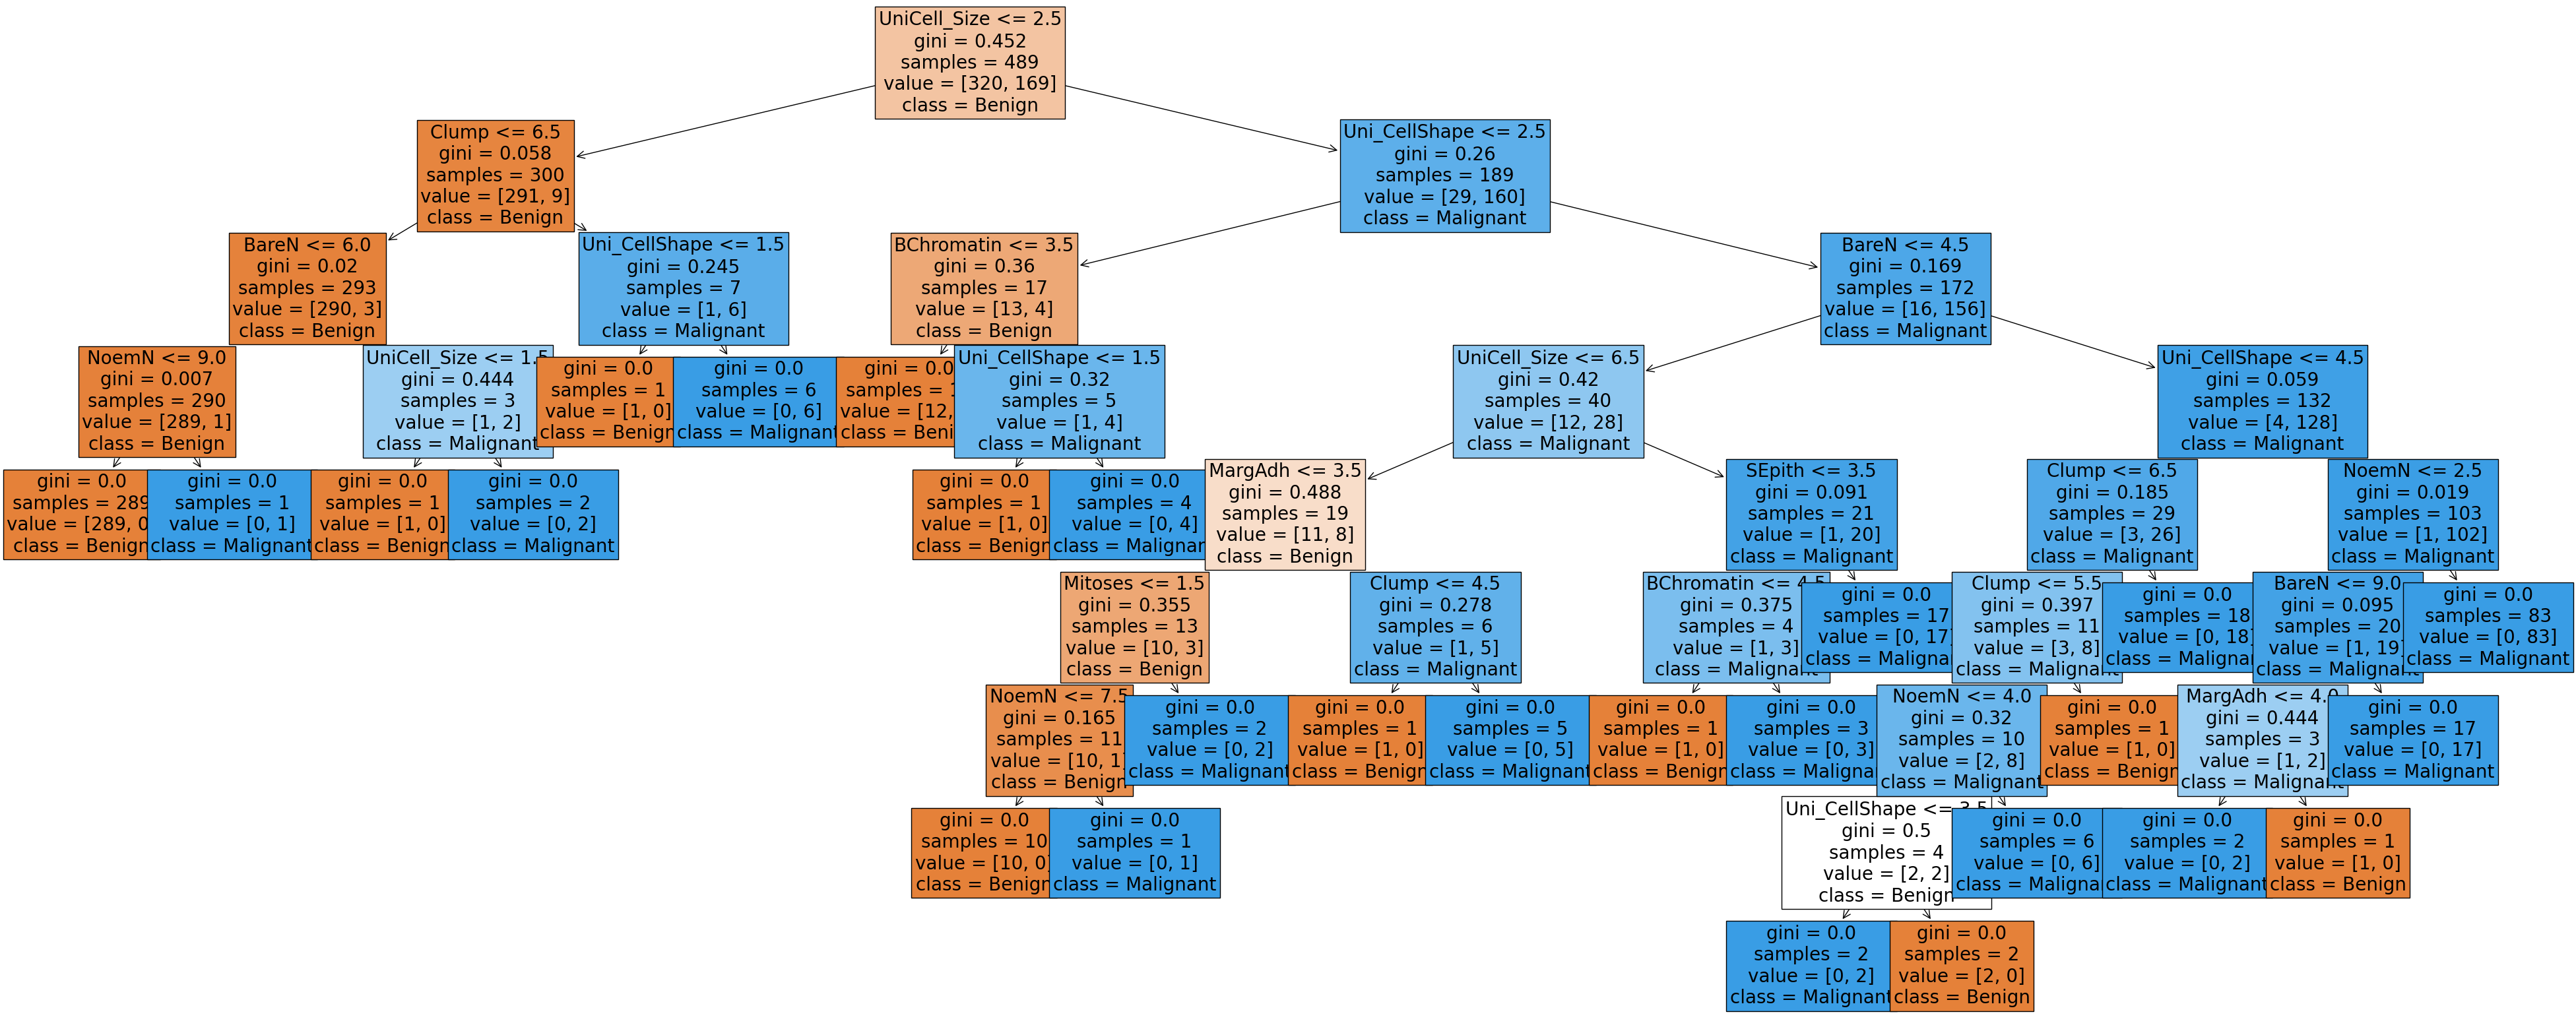

In [6]:
#Creating a graphical representation of Tree
plt.figure(figsize=(50,20))
plot_tree(dtc,feature_names=X_train.columns,class_names=['Benign', 'Malignant'], filled=True,fontsize=20)
plt.show()

In [7]:
dtc.predict(X_test)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False, False,

In [8]:
dtc.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [9]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'max_depth':[2,3,4,5,6,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,3,5,7,10,15]}
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}
-0.2456110095055712


In [10]:
best_model=gcv.best_estimator_
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,Clump,0.000000
1,UniCell_Size,0.886462
2,Uni_CellShape,0.079546
3,MargAdh,0.000000
4,SEpith,0.000000
5,BareN,0.000000
6,BChromatin,0.033991
7,NoemN,0.000000
8,Mitoses,0.000000


In [11]:
df_imp=df_imp[df_imp['importance']>0.0001]

In [12]:
df_imp=df_imp.sort_values(by='importance',ascending=False)

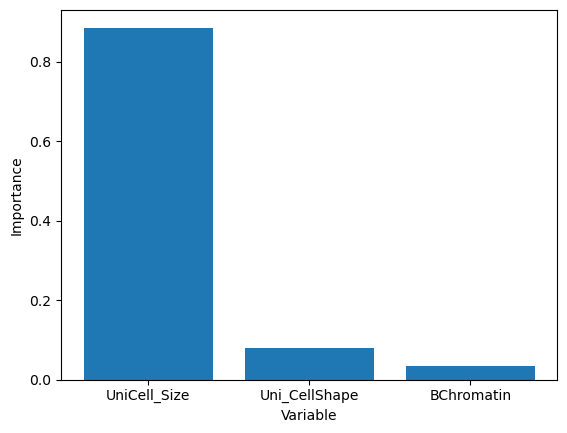

In [13]:
plt.bar(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.xlabel("Variable")
plt.show()

In [14]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}